# Amath 582 Computational Methods for Data Analysis Winter 2022

## Lecture 1
> Introduction to the course 

### Homework Instructions

\begin{itemize}
\item Title/author/abstract
\item Sec.1 Introduction and Overview
\item Sec.2 Theoretical Background
\item Sec.3 Algorithm Implementation and Development
\item Sec.4 Computational Results
\item Sec.5 Summary and Conclusions
\item Acknowledgment 

<br><br>
Jupyter notebook, LaTex preferred

\end{itemize}


### Review of Basic Concepts from Stats & Probability

\begin{itemize}
\item $P(X=x_j)=P_j$<br> 
$X:\Omega \quad\rightarrow \quad${$x_1,x_2,...,x_n$}


<br><br>
$\mathbb{E}(X):=\sum_{j=1}^n P_j x_j\\$
$Var(X):=E([x-E(x)]^2).$

\item $\sigma:\mathbb{R^d} \rightarrow \mathbb{R}$ is a probability density function (pdf) for the r.v. $X$  

$P(X\in A)=\int_{\mathbb{R^d}}\sigma (x)\,dx,$ for any open set $A \subseteq\mathbb{R^d}$

$\mathbb{E}(X):=\int_{\mathbb{R^d}}x\sigma (x)\, dx) \\$ 
$Cov(X):=\int_{\mathbb{R^d}}(x-\mathbb{E}(X))\sigma (x)\\,dx \equiv Var(X)$

\item independent events: given sets $A,B \subset \mathbb{R^d}$ we have
$$P(X\in A \;and\; Y\in B)=P(X\in A)P(Y \in B)$$ examples, flip two coins.<br>
If two events are independent, then 
$$\mathbb{E}(X^TY)=\mathbb{E}(X)^T\mathbb{E}(Y)$$

\begin{align}
Cov(X,Y):& =\mathbb{E}[(X-\mathbb{E}(X))(Y-\mathbb{E}(Y))^T]\\
& =\mathbb{E}[XY^T-\mathbb{E}(X)Y^T-X\mathbb{E}(Y)^T+\mathbb{E}(X)\mathbb{E}(Y)^T]\\
& = \mathbb{E}(XY^T)-2\mathbb{E}(X)\mathbb{E}(Y)^T+\mathbb{E}(X)\mathbb{E}(Y)^T\\
& = \mathbb{E}(XY^T)-\mathbb{E}(X)\mathbb{E}(Y)^T
\end{align}

if two events are independent, $Cov(X,Y)=0$ (the inverse isn't true)

\end{itemize}


## Lecture 2 
 
>Signal Processing with Discrete Fourier Transform

### Fourier Transform on real line:



Given $f:\mathbb{R} \quad \rightarrow \quad \mathbb{R}$ we define its Fourier Transform 

$$\mathcal{F}(f)\equiv \hat{f}(k):=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)e^{-ikx}\,dx$$
& inverse FT for $g: \mathbb{R} \quad \rightarrow \quad \mathbb{C} $

$$\mathcal{F}^{-1}(g)\equiv \hat{g}(x):=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty g(k)e^{ikx}\,dk$$

The fact that $\mathcal{F}^{-1}(\mathcal{F}(f))=f$ is a consequence of the Fourier integral theorem. 

### FT Properties

\begin{itemize}
\item Linearity
\item Shifts/Translations $(\widehat{f(x-x_0)})_k=e^{-ikx_0}\hat{f}_k$
\item Differentiation:
$(\widehat{f^{(n)}})_k=(ik)^n\hat{f}_k$
\item Integration:
$\int_0^{2\pi}f(x)\,dx=\hat{f}_0$
\item Convolution: $f,g$ periodic on $[0,2\pi]$
$(f\ast g)(x):=\int_0^{2\pi}f(x-y)g(y)\,dy\\$
$(\widehat{f\ast g})_k=2\pi \hat{f}_k\hat{g}_k$
\end{itemize}


## Lecture 3

Recall FS:

$f: [0,2L] \rightarrow \mathbb{R}, C_R:=\frac{1}{2L}\int_0^{2L}f(x)exp(-\frac{iRkx}{L})\,dx$

$f(k)=\sum_{k=-\infty}^\infty exp(\frac{iRkx}{L}), C_R\in \mathbb{C} $

### FFT examples:

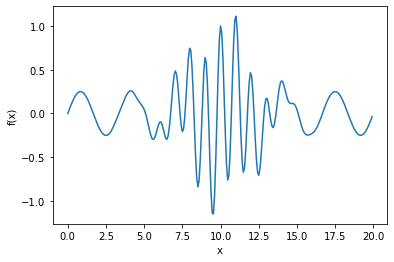

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,sig,k1,k2,L):
    val=np.exp(-x**2/(2*sig**2))*np.cos(k1*x*np.pi/L)+0.25*np.sin(k2*x*np.pi/L) 
    return val
L=10
N_grid=2**8
xx=np.linspace(0,2*L,N_grid+1)
xx=xx[:-1]
s=2
k1,k2=20,6

ff=f(xx-L,s,k1,k2,L)


plt.plot(xx,ff)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


/home/raph651/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


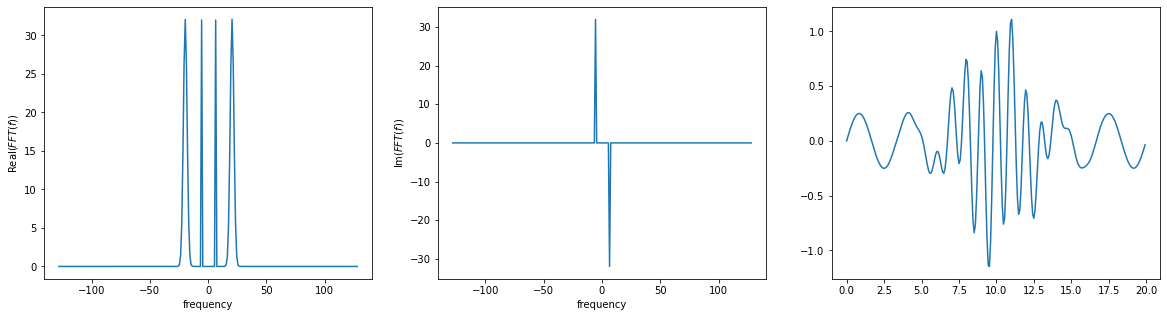

In [2]:
f_fft=np.fft.fft(ff)
f_fft=np.fft.fftshift(f_fft)
n=np.linspace(-N_grid/2,N_grid/2,N_grid)

fig,(ax0,ax1,ax2)=plt.subplots(1,3, figsize=(20,5))

ax0.plot(n,np.abs(f_fft))
ax0.set_xlabel('frequency')
ax0.set_ylabel('Real($FFT(f)$)')

ax1.plot(n,f_fft.imag)
ax1.set_xlabel('frequency')
ax1.set_ylabel('Im($FFT(f)$)')

ff_i=np.fft.ifft(np.fft.fftshift(f_fft))
ax2.plot(xx,ff_i)
plt.show()



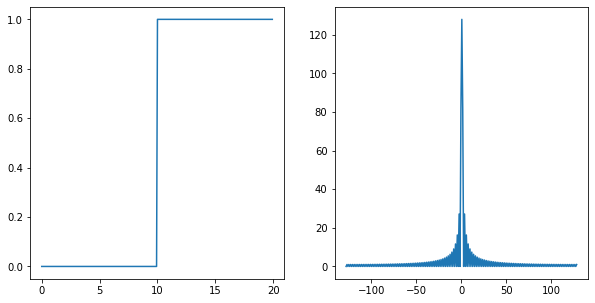

In [3]:
def g(x,L):
    return (x>=L)
f1=g(xx,L)
ff1=np.fft.fftshift(np.fft.fft(f1))

fig1,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
ax0.plot(xx,f1)
ax1.plot(n,np.abs(ff1))

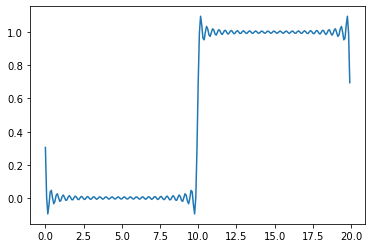

In [9]:
filter=(np.abs(n)<=50)

filter.astype(float)
ff1_clean=np.fft.ifft(np.fft.fftshift(filter*ff1))
plt.plot(xx,ff1_clean.real)

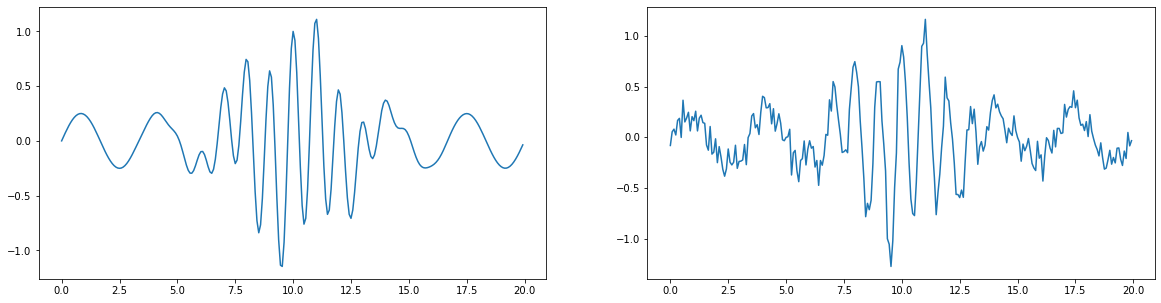

In [5]:
ff_noise=ff+0.1*np.random.randn(N_grid)
fig2,(ax0,ax1)=plt.subplots(1,2,figsize=(20,5))

ax0.plot(xx,ff)
ax1.plot(xx,ff_noise)


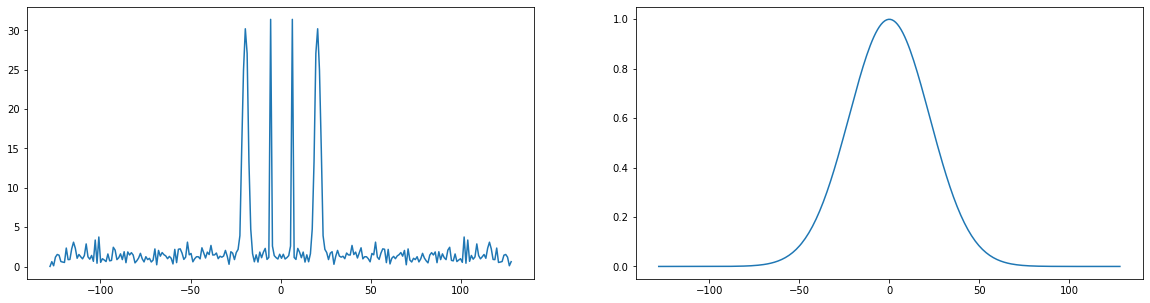

In [6]:
ff_noise_hat=np.fft.fftshift(np.fft.fft(ff_noise))
fig,(ax0,ax1)=plt.subplots(1,2, figsize=(20,5))
gaussian_filter=np.exp(-0.001*n**2)
ax0.plot(n,np.abs(ff_noise_hat))
ax1.plot(n,gaussian_filter)

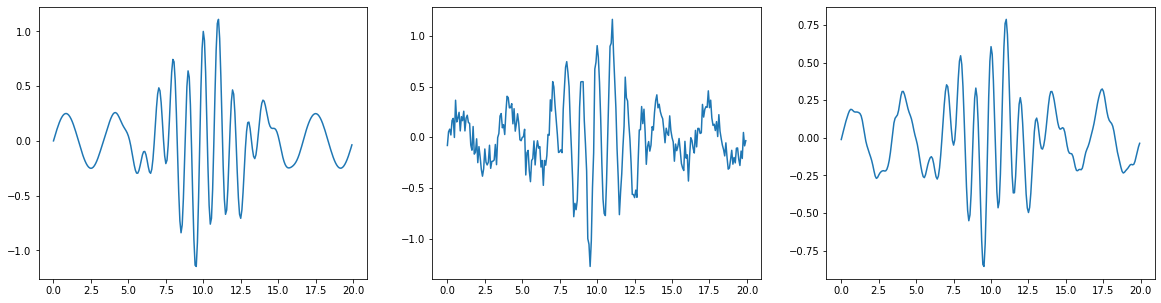

In [8]:
ff_clean=np.fft.ifft(np.fft.ifftshift(ff_noise_hat*gaussian_filter))

fig,(ax0,ax1,ax2)=plt.subplots(1,3, figsize=(20,5))
ax0.plot(xx,ff)
ax1.plot(xx,ff_noise)
ax2.plot(xx,ff_clean.real)
